# Homework 2

In this homework, we are gonna perform some EDA work on our browser history!

Extract & prepare your history dataset using: `https://github.com/msaricaumbc/DS601/blob/main/Week09/homework/preparation_BrowserHistory.ipynb`

DO NOT commit your history dataset!

Watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# this data is only for a month
df = pd.read_csv('/Users/tanyawalia/Downloads/browing_history.csv')
df.shape

(3830, 2)

In [4]:
# getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3830 entries, 0 to 3829
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url_domain  3807 non-null   object
 1   time        3830 non-null   object
dtypes: object(2)
memory usage: 60.0+ KB


In [5]:
# looking at the top 5 rows of my dataset to know what type of information is stored in which column
df.head()

,url_domain,time
0,chromewebstore.google.com,2024-09-19 1:09:22
1,chromewebstore.google.com,2024-09-19 1:09:21
2,www.google.com,2024-09-19 1:09:20
3,www.google.com,2024-09-19 1:09:19
4,www.google.com,2024-09-19 1:09:13


In [6]:
# checking if there are any null values in the dataset
df.isna().sum()

url_domain    23
time           0
dtype: int64

In [7]:
# dropping the columns permanently with the null values
df.dropna(inplace=True)

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['time'] < '2025')

3807

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.time > '2024'].copy()

In [10]:
df['time'] = pd.to_datetime(df['time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

url_domain            object
time          datetime64[ns]
dtype: object

In [13]:
df.head()

,url_domain,time
0,chromewebstore.google.com,2024-09-19 01:09:22
1,chromewebstore.google.com,2024-09-19 01:09:21
2,www.google.com,2024-09-19 01:09:20
3,www.google.com,2024-09-19 01:09:19
4,www.google.com,2024-09-19 01:09:13


In [14]:
df['url_domain'].value_counts()[:50]

url_domain
mail.google.com                       721
www.google.com                        417
webauth.umbc.edu                      320
app.joinhandshake.com                 318
blackboard.umbc.edu                   248
docs.google.com                       220
api-4f567d87.duosecurity.com          146
my.umbc.edu                           144
commerce.cashnet.com                   88
accounts.google.com                    64
usmai-umbc.primo.exlibrisgroup.com     59
my3.my.umbc.edu                        55
us.shein.com                           50
isss-portal.umbc.edu                   42
colab.research.google.com              41
careers.compassgroupcareers.com        37
leanprover.zulipchat.com               35
myretrievercare.umbc.edu               32
umbcstudents-md.safecolleges.com       28
account.3rdmil.com                     28
discord.com                            27
calendar.google.com                    24
dineoncampus.com                       23
csprd-web.ps.umbc.edu  

<Axes: xlabel='url_domain'>

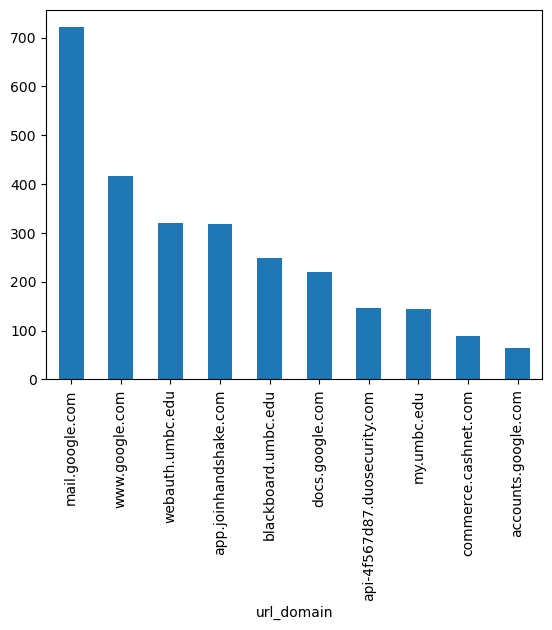

In [15]:
# top 10 sites that were visited
df['url_domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.time.dt.hour).url_domain.size()
hourly_counts

time
0     242
1     144
2     165
3      32
4       3
5      72
6     214
7     180
8     109
9     184
10     47
11    254
12    214
13    211
14    282
15    348
16    115
17     54
18     93
19     22
20     40
21    107
22    225
23    450
Name: url_domain, dtype: int64

<Axes: xlabel='time'>

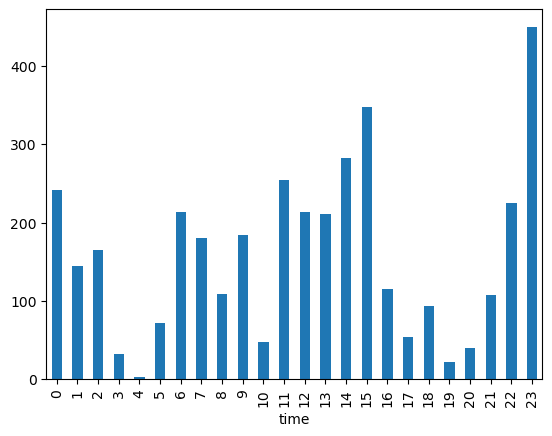

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['time']]
df['DayIndex'] = [ d.dayofweek for d in df['time']]
df.head()

,url_domain,time,Day,DayIndex
0,chromewebstore.google.com,2024-09-19 01:09:22,Thursday,3
1,chromewebstore.google.com,2024-09-19 01:09:21,Thursday,3
2,www.google.com,2024-09-19 01:09:20,Thursday,3
3,www.google.com,2024-09-19 01:09:19,Thursday,3
4,www.google.com,2024-09-19 01:09:13,Thursday,3


In [19]:
df['Day'].value_counts()

Day
Thursday     805
Tuesday      764
Monday       721
Wednesday    597
Friday       504
Saturday     250
Sunday       166
Name: count, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

DayIndex
0    721
1    764
2    597
3    805
4    504
5    250
6    166
Name: count, dtype: int64

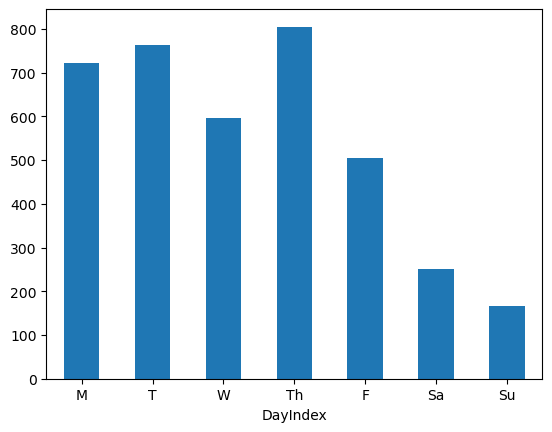

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day):
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,url_domain,time,Day,DayIndex,isWeekend
0,chromewebstore.google.com,2024-09-19 01:09:22,Thursday,3,False
1,chromewebstore.google.com,2024-09-19 01:09:21,Thursday,3,False
2,www.google.com,2024-09-19 01:09:20,Thursday,3,False
3,www.google.com,2024-09-19 01:09:19,Thursday,3,False
4,www.google.com,2024-09-19 01:09:13,Thursday,3,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,url_domain,time,Day,DayIndex,isWeekend
430,docs.google.com,2024-09-15 23:57:32,Sunday,6,True
431,docs.google.com,2024-09-15 23:57:22,Sunday,6,True
432,docs.google.com,2024-09-15 23:57:22,Sunday,6,True
433,docs.google.com,2024-09-15 23:57:21,Sunday,6,True
434,docs.google.com,2024-09-15 23:57:03,Sunday,6,True


In [25]:
weekday['url_domain'].value_counts()[:5]

url_domain
mail.google.com          657
www.google.com           372
webauth.umbc.edu         310
app.joinhandshake.com    292
blackboard.umbc.edu      235
Name: count, dtype: int64

In [26]:
weekend['url_domain'].value_counts()[:5]

url_domain
docs.google.com                    119
mail.google.com                     64
www.google.com                      45
app.joinhandshake.com               26
careers.compassgroupcareers.com     24
Name: count, dtype: int64

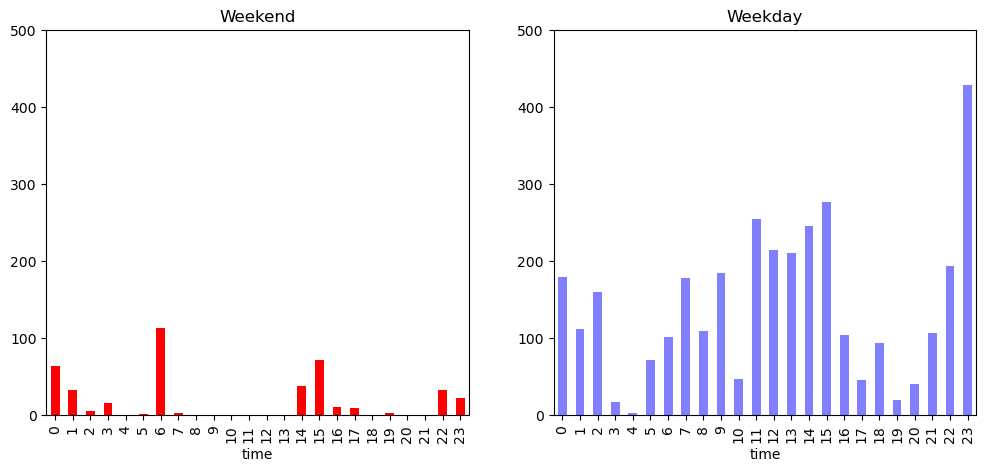

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.time.dt.hour).url_domain.size()

    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up

    if fig != None:
        plt.subplot(1,2, fig)

    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 500])


plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)

show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


Be skeptical!

Am I on computer a lot more on the weekdays or it shows more simply because there are more weekdays

/var/folders/jq/h3wsr_9j7gnd8k9v19bk5gm40000gn/T/ipykernel_55857/2220845141.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '355.55555555555554' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
/var/folders/jq/h3wsr_9j7gnd8k9v19bk5gm40000gn/T/ipykernel_55857/2220845141.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '372.9166666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals


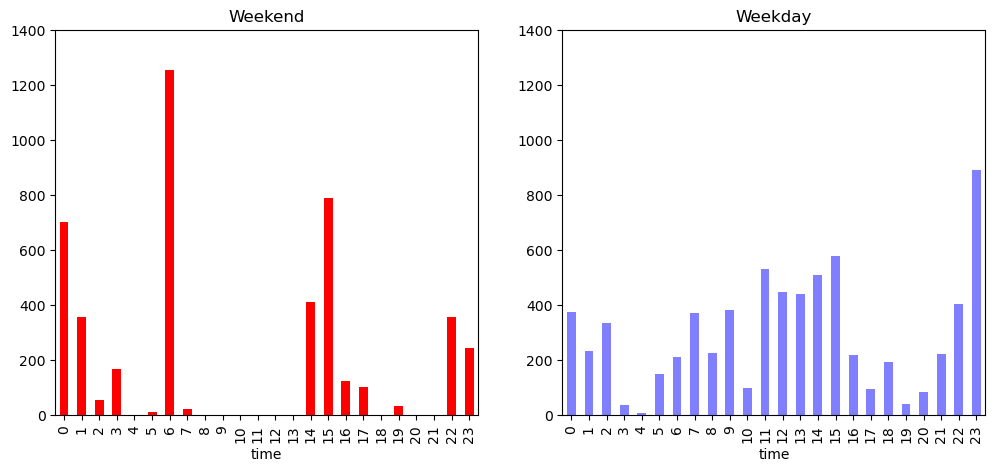

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.time.dt.hour).url_domain.size()

    days_counts = df.time.dt.date.nunique()

    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else:
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals

    if fig != None:
        plt.subplot(1,2, fig)

    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)

    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1400]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)

show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['url_domain'].value_counts()[:10]

url_domain
mail.google.com                 721
www.google.com                  417
webauth.umbc.edu                320
app.joinhandshake.com           318
blackboard.umbc.edu             248
docs.google.com                 220
api-4f567d87.duosecurity.com    146
my.umbc.edu                     144
commerce.cashnet.com             88
accounts.google.com              64
Name: count, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['url_domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

/var/folders/jq/h3wsr_9j7gnd8k9v19bk5gm40000gn/T/ipykernel_55857/2220845141.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '179.24528301886792' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals


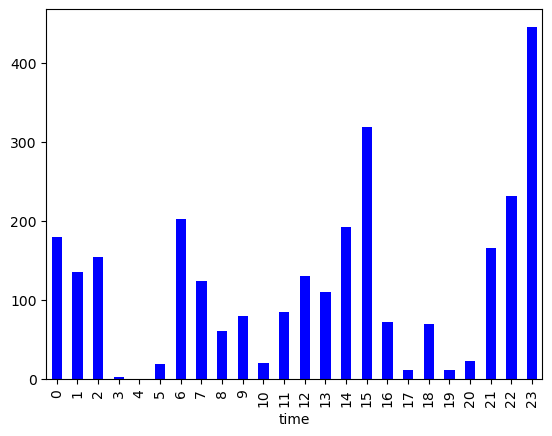

In [33]:
_= show_domain_stats('google', 'blue')

/var/folders/jq/h3wsr_9j7gnd8k9v19bk5gm40000gn/T/ipykernel_55857/2220845141.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98.14814814814815' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals


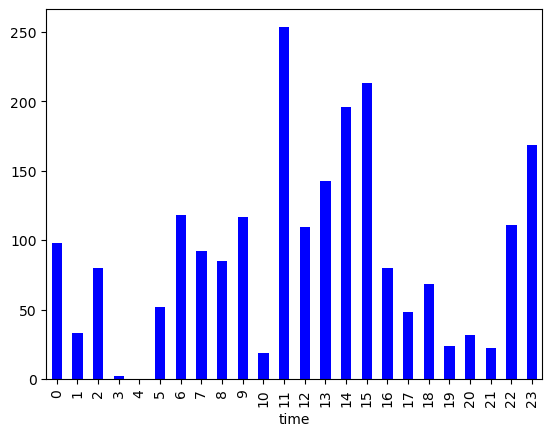

In [34]:
_= show_domain_stats('umbc', 'blue')

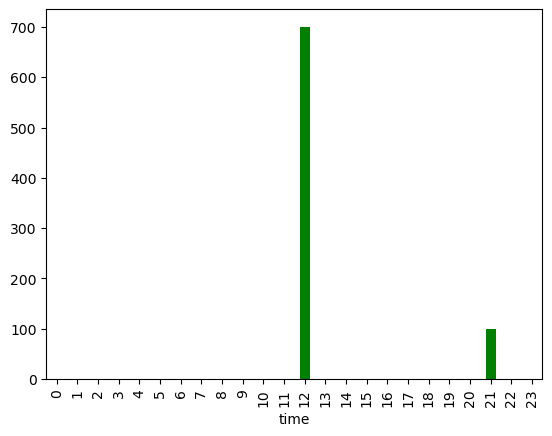

In [35]:
_ = show_domain_stats('chatgpt', 'green')

/var/folders/jq/h3wsr_9j7gnd8k9v19bk5gm40000gn/T/ipykernel_55857/2220845141.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '82.05128205128206' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals


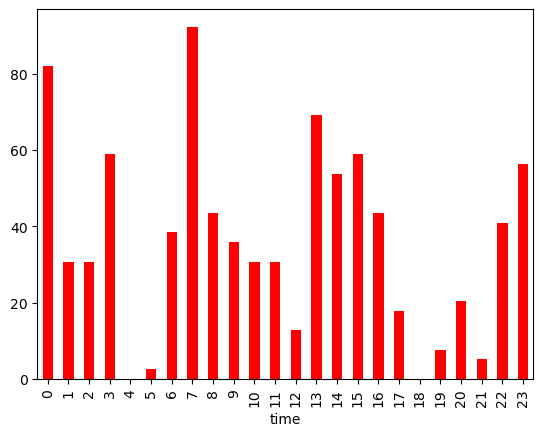

In [36]:
_ = show_domain_stats('handshake', 'red')

/var/folders/jq/h3wsr_9j7gnd8k9v19bk5gm40000gn/T/ipykernel_55857/2220845141.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.090909090909092' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals


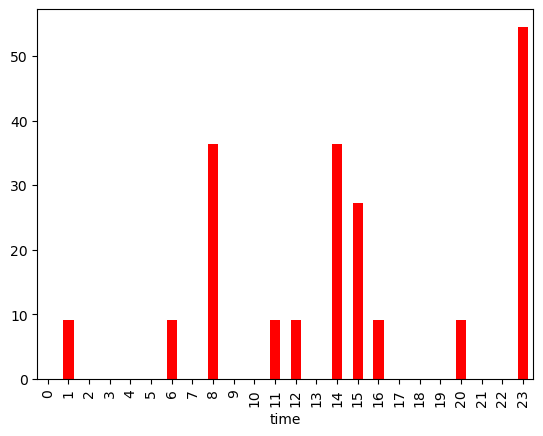

In [37]:
_ = show_domain_stats('github', 'red')

/var/folders/jq/h3wsr_9j7gnd8k9v19bk5gm40000gn/T/ipykernel_55857/2220845141.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals


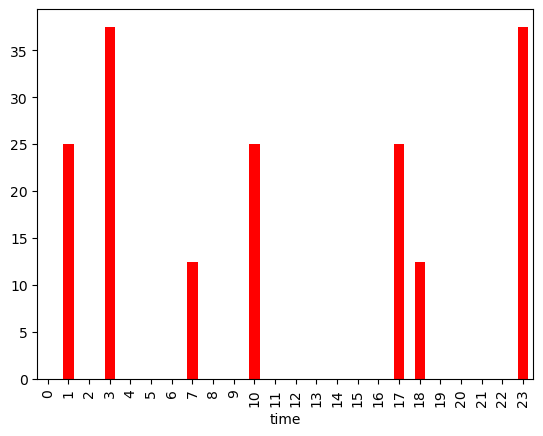

In [38]:
_ = show_domain_stats('linkedin', 'red')

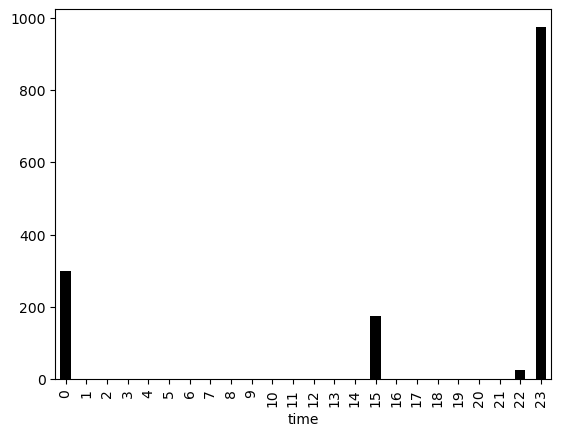

In [39]:
_=show_domain_stats('amazon|shein', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
>- This is a personal computer
3. Is user employed?
>- Since, the user is spending more time on UMBC wesbite for authentication, the person is likely to be a student.
4. What is his interests?
>  The person is looking for a job on handshake and spends more time on google and gmail.
5. Anything interesting?
>  This person visit online shopping platforms very occasionally (quite strange).